In [101]:
import pandas as pd
import numpy as np

data            = pd.read_csv("../../preproc/may_jump_encoded_bike.csv", header = None).to_numpy()
indep_test_data = pd.read_csv("../../preproc/june_jump_encoded_bike.csv", header = None).to_numpy()

read = 5

#assert pred > 0

X = np.concatenate([data[:,10-read:10], data[:,-2-read:-2]], axis = 1)#data[:,:-1]
X = X.reshape((X.shape[0], -1, X.shape[1] // 2)).swapaxes(1,2)
Y = data[:,-1:]

X_it = np.concatenate([indep_test_data[:,10-read:10], indep_test_data[:,-2-read:-2]], axis = 1)
X_it = X_it.reshape((X_it.shape[0], -1, X_it.shape[1] // 2)).swapaxes(1,2)
Y_it = indep_test_data[:,-1:]

In [102]:
X.shape, X_it.shape

((512882, 5, 2), (382732, 5, 2))

In [230]:
from tensorflow import keras
from tensorflow.keras import layers, optimizers
import tensorflow as tf

seed_value = 1789

np.random.seed(seed_value)
tf.random.set_seed(seed_value)

lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=3e-3,
    decay_steps=10000,
    decay_rate=0.9)

model = keras.Sequential()
model.add(layers.Input  (shape=(read, 2)))
model.add(layers.Flatten())
model.add(layers.Dense  ( 64, kernel_initializer = "glorot_normal", activation='relu'))
model.add(layers.Dense  (128, kernel_initializer = "glorot_normal", activation='relu'))
model.add(layers.Dropout(rate = .025))
model.add(layers.Dense  ( 64, kernel_initializer = "glorot_normal", activation='relu'))
model.add(layers.Dense  ( 32, kernel_initializer = "glorot_normal", activation='relu'))
model.add(layers.Dense  ( 16, kernel_initializer = "glorot_normal", activation='relu'))
model.add(layers.Dense  (  8, kernel_initializer = "glorot_normal"))
model.add(layers.Softmax())

loss_function = 'SparseCategoricalCrossentropy'
adam = tf.keras.optimizers.Adam(learning_rate=0.003)
model.compile(loss=loss_function, optimizer=adam,metrics=['SparseCategoricalCrossentropy', 'SparseCategoricalAccuracy'])

In [231]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 10)                0         
_________________________________________________________________
dense_95 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_96 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_98 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_99 (Dense)             (None, 16)              

In [232]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.70)

In [233]:
history = model.fit(X_train, Y_train, epochs= 200,batch_size=1024, validation_data=(X_test, Y_test))

Epoch 1/200
351/351 [==============================] - 1s 2ms/step - loss: 1.3872 - sparse_categorical_crossentropy: 1.3872 - sparse_categorical_accuracy: 0.4604 - val_loss: 1.1821 - val_sparse_categorical_crossentropy: 1.1821 - val_sparse_categorical_accuracy: 0.5476
Epoch 2/200
351/351 [==============================] - 1s 2ms/step - loss: 1.1757 - sparse_categorical_crossentropy: 1.1757 - sparse_categorical_accuracy: 0.5464 - val_loss: 1.1272 - val_sparse_categorical_crossentropy: 1.1272 - val_sparse_categorical_accuracy: 0.5745
Epoch 3/200
351/351 [==============================] - 1s 2ms/step - loss: 1.1332 - sparse_categorical_crossentropy: 1.1332 - sparse_categorical_accuracy: 0.5687 - val_loss: 1.1044 - val_sparse_categorical_crossentropy: 1.1044 - val_sparse_categorical_accuracy: 0.5869
Epoch 4/200
351/351 [==============================] - 1s 2ms/step - loss: 1.1053 - sparse_categorical_crossentropy: 1.1053 - sparse_categorical_accuracy: 0.5862 - val_loss: 1.0720 - val_sparse

351/351 [==============================] - 1s 2ms/step - loss: 0.9319 - sparse_categorical_crossentropy: 0.9319 - sparse_categorical_accuracy: 0.6686 - val_loss: 0.9250 - val_sparse_categorical_crossentropy: 0.9250 - val_sparse_categorical_accuracy: 0.6717
Epoch 32/200
351/351 [==============================] - 1s 2ms/step - loss: 0.9321 - sparse_categorical_crossentropy: 0.9321 - sparse_categorical_accuracy: 0.6672 - val_loss: 0.9501 - val_sparse_categorical_crossentropy: 0.9501 - val_sparse_categorical_accuracy: 0.6583
Epoch 33/200
351/351 [==============================] - 1s 2ms/step - loss: 0.9321 - sparse_categorical_crossentropy: 0.9321 - sparse_categorical_accuracy: 0.6666 - val_loss: 0.9259 - val_sparse_categorical_crossentropy: 0.9259 - val_sparse_categorical_accuracy: 0.6711
Epoch 34/200
351/351 [==============================] - 1s 2ms/step - loss: 0.9275 - sparse_categorical_crossentropy: 0.9275 - sparse_categorical_accuracy: 0.6695 - val_loss: 0.9218 - val_sparse_categori

351/351 [==============================] - 1s 2ms/step - loss: 0.8956 - sparse_categorical_crossentropy: 0.8956 - sparse_categorical_accuracy: 0.6825 - val_loss: 0.8961 - val_sparse_categorical_crossentropy: 0.8961 - val_sparse_categorical_accuracy: 0.6845
Epoch 62/200
351/351 [==============================] - 1s 2ms/step - loss: 0.8975 - sparse_categorical_crossentropy: 0.8975 - sparse_categorical_accuracy: 0.6816 - val_loss: 0.8964 - val_sparse_categorical_crossentropy: 0.8964 - val_sparse_categorical_accuracy: 0.6843
Epoch 63/200
351/351 [==============================] - 1s 2ms/step - loss: 0.8977 - sparse_categorical_crossentropy: 0.8977 - sparse_categorical_accuracy: 0.6821 - val_loss: 0.8993 - val_sparse_categorical_crossentropy: 0.8993 - val_sparse_categorical_accuracy: 0.6833
Epoch 64/200
351/351 [==============================] - 1s 2ms/step - loss: 0.8952 - sparse_categorical_crossentropy: 0.8952 - sparse_categorical_accuracy: 0.6832 - val_loss: 0.8959 - val_sparse_categori

351/351 [==============================] - 1s 2ms/step - loss: 0.8806 - sparse_categorical_crossentropy: 0.8806 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8858 - val_sparse_categorical_crossentropy: 0.8858 - val_sparse_categorical_accuracy: 0.6883
Epoch 92/200
351/351 [==============================] - 1s 2ms/step - loss: 0.8792 - sparse_categorical_crossentropy: 0.8792 - sparse_categorical_accuracy: 0.6899 - val_loss: 0.8831 - val_sparse_categorical_crossentropy: 0.8831 - val_sparse_categorical_accuracy: 0.6917
Epoch 93/200
351/351 [==============================] - 1s 2ms/step - loss: 0.8804 - sparse_categorical_crossentropy: 0.8804 - sparse_categorical_accuracy: 0.6890 - val_loss: 0.8891 - val_sparse_categorical_crossentropy: 0.8891 - val_sparse_categorical_accuracy: 0.6859
Epoch 94/200
351/351 [==============================] - 1s 2ms/step - loss: 0.8776 - sparse_categorical_crossentropy: 0.8776 - sparse_categorical_accuracy: 0.6896 - val_loss: 0.8851 - val_sparse_categori

351/351 [==============================] - 1s 2ms/step - loss: 0.8700 - sparse_categorical_crossentropy: 0.8700 - sparse_categorical_accuracy: 0.6941 - val_loss: 0.8765 - val_sparse_categorical_crossentropy: 0.8765 - val_sparse_categorical_accuracy: 0.6932
Epoch 122/200
351/351 [==============================] - 1s 2ms/step - loss: 0.8664 - sparse_categorical_crossentropy: 0.8664 - sparse_categorical_accuracy: 0.6946 - val_loss: 0.8734 - val_sparse_categorical_crossentropy: 0.8734 - val_sparse_categorical_accuracy: 0.6947
Epoch 123/200
351/351 [==============================] - 1s 2ms/step - loss: 0.8696 - sparse_categorical_crossentropy: 0.8696 - sparse_categorical_accuracy: 0.6936 - val_loss: 0.8771 - val_sparse_categorical_crossentropy: 0.8771 - val_sparse_categorical_accuracy: 0.6941
Epoch 124/200
351/351 [==============================] - 1s 2ms/step - loss: 0.8681 - sparse_categorical_crossentropy: 0.8681 - sparse_categorical_accuracy: 0.6942 - val_loss: 0.8769 - val_sparse_categ

351/351 [==============================] - 1s 2ms/step - loss: 0.8620 - sparse_categorical_crossentropy: 0.8620 - sparse_categorical_accuracy: 0.6973 - val_loss: 0.8707 - val_sparse_categorical_crossentropy: 0.8707 - val_sparse_categorical_accuracy: 0.6954
Epoch 152/200
351/351 [==============================] - 1s 2ms/step - loss: 0.8653 - sparse_categorical_crossentropy: 0.8653 - sparse_categorical_accuracy: 0.6956 - val_loss: 0.8728 - val_sparse_categorical_crossentropy: 0.8728 - val_sparse_categorical_accuracy: 0.6930
Epoch 153/200
351/351 [==============================] - 1s 2ms/step - loss: 0.8598 - sparse_categorical_crossentropy: 0.8598 - sparse_categorical_accuracy: 0.6979 - val_loss: 0.8646 - val_sparse_categorical_crossentropy: 0.8646 - val_sparse_categorical_accuracy: 0.6991
Epoch 154/200
351/351 [==============================] - 1s 2ms/step - loss: 0.8603 - sparse_categorical_crossentropy: 0.8603 - sparse_categorical_accuracy: 0.6972 - val_loss: 0.8688 - val_sparse_categ

351/351 [==============================] - 1s 2ms/step - loss: 0.8516 - sparse_categorical_crossentropy: 0.8516 - sparse_categorical_accuracy: 0.6998 - val_loss: 0.8645 - val_sparse_categorical_crossentropy: 0.8645 - val_sparse_categorical_accuracy: 0.6988
Epoch 182/200
351/351 [==============================] - 1s 2ms/step - loss: 0.8576 - sparse_categorical_crossentropy: 0.8576 - sparse_categorical_accuracy: 0.6993 - val_loss: 0.8608 - val_sparse_categorical_crossentropy: 0.8608 - val_sparse_categorical_accuracy: 0.7000
Epoch 183/200
351/351 [==============================] - 1s 2ms/step - loss: 0.8584 - sparse_categorical_crossentropy: 0.8584 - sparse_categorical_accuracy: 0.6975 - val_loss: 0.8636 - val_sparse_categorical_crossentropy: 0.8636 - val_sparse_categorical_accuracy: 0.6997
Epoch 184/200
351/351 [==============================] - 1s 2ms/step - loss: 0.8557 - sparse_categorical_crossentropy: 0.8557 - sparse_categorical_accuracy: 0.6991 - val_loss: 0.8662 - val_sparse_categ

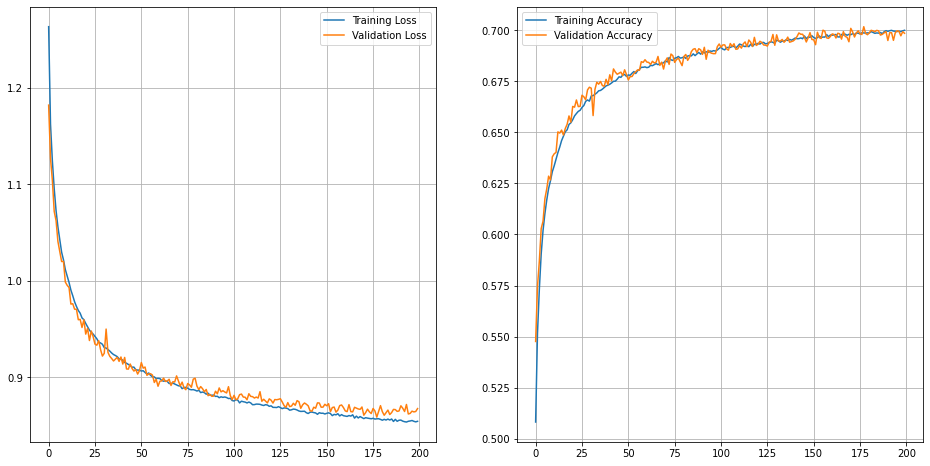

In [243]:
import matplotlib.pyplot as plt

f, a = plt.subplots(ncols = 2, figsize=(16,8))

a[0].plot(history.history['loss'], label = "Training Loss")
a[0].plot(history.history['val_loss'], label = "Validation Loss")

a[0].legend()
#a[0].set_ylim(bottom = 0)
a[0].grid(True)

a[1].plot(history.history['sparse_categorical_accuracy'], label = "Training Accuracy")
a[1].plot(history.history['val_sparse_categorical_accuracy'], label = "Validation Accuracy")

a[1].legend()
#a[1].set_ylim(bottom = 0, top = 1)
a[1].grid(True)

In [244]:
p_vectors = model.predict(X_test)
p_idx     = np.array([np.argmax(v) for v in p_vectors])
p_idx.shape

(153865,)

In [245]:
t = Y_test.flatten()
t.shape

(153865,)

In [246]:
np.sum(t == p_idx) / p_idx.size

0.6986059207747051

In [247]:
it_p_vectors = model.predict(X_it)
it_p_idx     = np.array([np.argmax(v) for v in it_p_vectors])
it_p_idx.shape

(382732,)

In [248]:
it_t = Y_it.flatten()
np.sum(it_t == it_p_idx) / it_p_idx.size

0.6916589153768172

382731
4292
19762


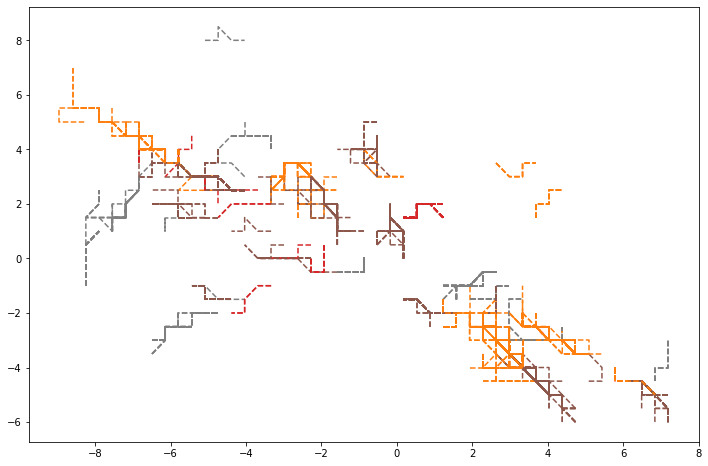

In [249]:
f_tracks, a_tracks = plt.subplots(figsize=(12,8))

colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:grey']

count = 0

count_diag = np.sum(np.fmod(it_t, 2.0) == 1) 

for n, it in enumerate(X_it):
    if it_p_idx[n] % 2 == 1 :
        count += 1
        a_tracks.plot(it[:,0], it[:,1], linestyle = '--', color=colori[it_p_idx[n]])

print(n)
print(count)
print(count_diag)

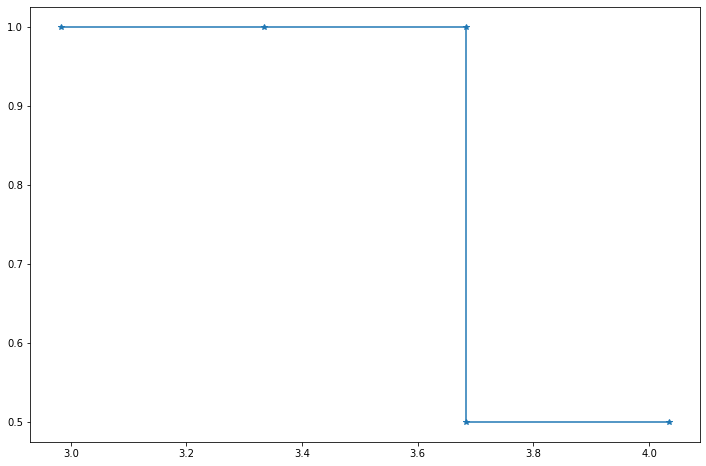

In [241]:
f_tracks, a_tracks = plt.subplots(figsize=(12,8))
X_it[0].shape
a_tracks.plot(X_it[0,:,0], X_it[0,:,1], marker = '*')


In [228]:
null_model = np.random.randint(0, 8, size = it_p_idx.shape[0])


In [242]:
np.sum(null_model == it_p_idx) / it_p_idx.size

0.12469822225473699